# 3장 후반부 코드

### 작성 : [PinkWink](http://pinkwink.kr) 

## 네이버 영화 평점 기준 영화의 평점 변화 확인하기

In [2]:
from bs4 import BeautifulSoup  
import pandas as pd

In [101]:
from urllib.request import urlopen

url_base = "http://movie.naver.com/"
url_syb = "movie/sdb/rank/rmovie.nhn?sel=cur&date=20170804"

page = urlopen(url_base+url_syb)

soup = BeautifulSoup(page, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20170804" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [107]:
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=62586" title="다크 나이트">다크 나이트</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=164290" title="킹 오브 프리즘 프라이드 더 히어로">킹 오브 프리즘 프라이드 더 히어로</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=152160" title="킹 오브 프리즘">킹 오브 프리즘</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10448" title="오즈의 마법사">오즈의 마법사</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=154437" title="내 사랑">내 사랑</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=160135" title="서서평, 천천히 평온하게">서서평, 천천히 평온하게</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10217" title="로보캅">로보캅</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=76309" title="플립">플립</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=159054" title="명탐정 코난:진홍의 연가">명탐정 코난:진홍의 연가</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?

In [108]:
soup.find_all('div', 'tit5')[0]

<div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=62586" title="다크 나이트">다크 나이트</a>
</div>

In [109]:
soup.find_all('div', 'tit5')[0].a

<a href="/movie/bi/mi/basic.nhn?code=62586" title="다크 나이트">다크 나이트</a>

In [110]:
soup.find_all('div', 'tit5')[0].a.string

'다크 나이트'

In [111]:
soup.find_all('td', 'point')

[<td class="point">9.32</td>,
 <td class="point">9.28</td>,
 <td class="point">9.25</td>,
 <td class="point">9.23</td>,
 <td class="point">9.23</td>,
 <td class="point">9.23</td>,
 <td class="point">9.21</td>,
 <td class="point">9.20</td>,
 <td class="point">9.18</td>,
 <td class="point">9.18</td>,
 <td class="point">9.14</td>,
 <td class="point">9.10</td>,
 <td class="point">9.09</td>,
 <td class="point">9.05</td>,
 <td class="point">9.05</td>,
 <td class="point">9.02</td>,
 <td class="point">9.00</td>,
 <td class="point">8.99</td>,
 <td class="point">8.94</td>,
 <td class="point">8.93</td>,
 <td class="point">8.91</td>,
 <td class="point">8.91</td>,
 <td class="point">8.87</td>,
 <td class="point">8.86</td>,
 <td class="point">8.84</td>,
 <td class="point">8.76</td>,
 <td class="point">8.76</td>,
 <td class="point">8.74</td>,
 <td class="point">8.71</td>,
 <td class="point">8.62</td>,
 <td class="point">8.59</td>,
 <td class="point">8.58</td>,
 <td class="point">8.49</td>,
 <td class

In [112]:
len(soup.find_all('td', 'point'))

49

In [113]:
soup.find_all('td', 'point')[0].string

'9.32'

In [114]:
movie_name = [soup.find_all('div', 'tit5')[n].a.string for n in range(0, 49)]
movie_name

['다크 나이트',
 '킹 오브 프리즘 프라이드 더 히어로',
 '킹 오브 프리즘',
 '오즈의 마법사',
 '내 사랑',
 '서서평, 천천히 평온하게',
 '로보캅',
 '플립',
 '명탐정 코난:진홍의 연가',
 '헤드윅',
 '댄서',
 '이터널 선샤인',
 '샤인',
 '올드보이',
 '어네스트와 셀레스틴',
 '기쿠지로의 여름',
 '파도가 지나간 자리',
 '택시운전사',
 '눈길',
 '노무현입니다',
 '스타쉽 트루퍼스',
 '파이트 클럽',
 '청원',
 '토탈 리콜',
 '극장판 짱구는 못말려 : 습격!! 외계인 덩덩이',
 '연애담',
 '너의 이름은.',
 '슈퍼배드 3',
 '꿈의 제인',
 '심야식당2',
 '라라랜드',
 '카3: 새로운 도전',
 '오두막',
 '스파이더맨: 홈커밍',
 '옥자',
 '500일의 썸머',
 '복수는 나의 것',
 '덩케르크',
 '예수는 역사다',
 '매치 포인트',
 '7번째 내가 죽던 날',
 '위시 어폰',
 '47 미터',
 '친절한 금자씨',
 '송 투 송',
 '그 후',
 '박쥐',
 '싸이보그지만 괜찮아',
 '군함도']

In [115]:
movie_point = [soup.find_all('td', 'point')[n].string for n in range(0, 49)]
movie_point

['9.32',
 '9.28',
 '9.25',
 '9.23',
 '9.23',
 '9.23',
 '9.21',
 '9.20',
 '9.18',
 '9.18',
 '9.14',
 '9.10',
 '9.09',
 '9.05',
 '9.05',
 '9.02',
 '9.00',
 '8.99',
 '8.94',
 '8.93',
 '8.91',
 '8.91',
 '8.87',
 '8.86',
 '8.84',
 '8.76',
 '8.76',
 '8.74',
 '8.71',
 '8.62',
 '8.59',
 '8.58',
 '8.49',
 '8.47',
 '8.47',
 '8.39',
 '8.34',
 '8.31',
 '8.14',
 '7.97',
 '7.84',
 '7.71',
 '7.40',
 '7.26',
 '7.03',
 '6.60',
 '6.09',
 '5.17',
 '4.95']

In [116]:
date = pd.date_range('2017-8-04', periods=100, freq='D')
date

DatetimeIndex(['2017-08-04', '2017-08-05', '2017-08-06', '2017-08-07',
               '2017-08-08', '2017-08-09', '2017-08-10', '2017-08-11',
               '2017-08-12', '2017-08-13', '2017-08-14', '2017-08-15',
               '2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19',
               '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23',
               '2017-08-24', '2017-08-25', '2017-08-26', '2017-08-27',
               '2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31',
               '2017-09-01', '2017-09-02', '2017-09-03', '2017-09-04',
               '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08',
               '2017-09-09', '2017-09-10', '2017-09-11', '2017-09-12',
               '2017-09-13', '2017-09-14', '2017-09-15', '2017-09-16',
               '2017-09-17', '2017-09-18', '2017-09-19', '2017-09-20',
               '2017-09-21', '2017-09-22', '2017-09-23', '2017-09-24',
               '2017-09-25', '2017-09-26', '2017-09-27', '2017-09-28',
      

In [117]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html = "http://movie.naver.com/" + \
                                    "movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    response = urlopen(html.format(date=
                                   urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, "html.parser")
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

C:\Users\edu\anaconda3\lib\site-packages\ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [118]:
len(movie_date), len(movie_name), len(movie_point)

(4940, 4940, 4940)

In [119]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 
                                      'point':movie_point})
movie.head()

,date,name,point
0,2017-08-04,다크 나이트,9.32
1,2017-08-04,킹 오브 프리즘 프라이드 더 히어로,9.28
2,2017-08-04,킹 오브 프리즘,9.25
3,2017-08-04,오즈의 마법사,9.23
4,2017-08-04,내 사랑,9.23


In [120]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4940 entries, 0 to 4939
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4940 non-null   datetime64[ns]
 1   name    4940 non-null   object        
 2   point   4940 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 115.9+ KB


In [121]:
movie['point'] = movie['point'].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4940 entries, 0 to 4939
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4940 non-null   datetime64[ns]
 1   name    4940 non-null   object        
 2   point   4940 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 115.9+ KB


In [122]:
import numpy as np

movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best#.head()

,point
name,
킹 오브 프리즘 프라이드 더 히어로,924.47
내 사랑,919.98
라라랜드,859.00
택시운전사,817.88
오두막,790.49
...,...
남영동1985,7.16
아가씨,7.08
공모자들,7.01


In [124]:
tmp = movie.query('name == ["다크 나이트"]')
tmp

,date,name,point
0,2017-08-04,다크 나이트,9.32
49,2017-08-05,다크 나이트,9.32
96,2017-08-06,다크 나이트,9.32
143,2017-08-07,다크 나이트,9.32
191,2017-08-08,다크 나이트,9.32
241,2017-08-09,다크 나이트,9.32
291,2017-08-10,다크 나이트,9.32
342,2017-08-11,다크 나이트,9.32
392,2017-08-12,다크 나이트,9.32
442,2017-08-13,다크 나이트,9.32


No handles with labels found to put in legend.


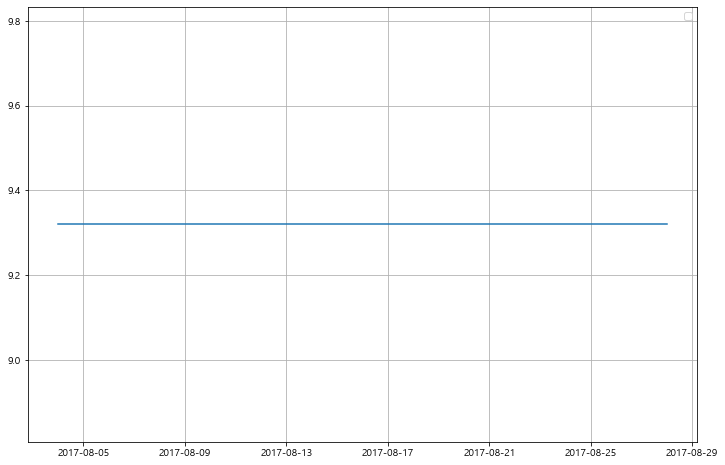

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

In [126]:
movie_best.head(10)

,point
name,
킹 오브 프리즘 프라이드 더 히어로,924.47
내 사랑,919.98
라라랜드,859.00
택시운전사,817.88
오두막,790.49
공범자들,783.42
빅풋 주니어,769.51
꿈의 제인,744.78
청년경찰,688.22


## 영화별 날짜 변화에 따른 평점 변화 확인하기

In [127]:
movie_pivot = pd.pivot_table(movie, index=["date"], columns=['name'], 
                                         values=['point'])
movie_pivot.head()

point                                                            \
name       47 미터 500일의 썸머 5일의 마중 7년-그들이 없는 언론 7번째 내가 죽던 날 8월의 크리스마스 가을의 전설   
date                                                                         
2017-08-04  7.40     8.39    NaN          NaN        7.84       NaN    NaN   
2017-08-05  7.40     8.39    NaN          NaN        7.84       NaN    NaN   
2017-08-06  7.39     8.39    NaN          NaN        7.84       NaN    NaN   
2017-08-07  7.39     8.39    NaN          NaN        7.84       NaN    NaN   
2017-08-08  7.38     8.39    NaN          NaN        7.85       NaN    NaN   

                                                    ...                       \
name       가장 따뜻한 색, 블루 건축학개론 고녀석 맛나겠다2 : 함께라서 행복해  ... 하이큐!! 승자와 패자 해피 데스데이   
date                                                ...                        
2017-08-04          NaN   NaN                  NaN  ...          NaN     NaN   
2017-08-05          NaN   NaN                  NaN  ...          NaN     NaN   
2017-08-06          NaN   NaN                  NaN  ...          NaN     NaN   
2017-08-07          NaN   NaN                  NaN  ...          NaN     NaN   
2017-08-08          NaN   NaN                  NaN  ...          NaN     NaN   

                                                            
name       행복 목욕탕   헤드윅 현기증 혜화,동 혹성탈출: 종의 전쟁  화차 희생부활자  히트  
date                                                        
2017-08-04    NaN  9.18 NaN  NaN         NaN NaN   NaN NaN  
2017-08-05    NaN  9.18 NaN  NaN         NaN NaN   NaN NaN  
2017-08-06    NaN  9.18 NaN  NaN         NaN NaN   NaN NaN  
2017-08-07    NaN  9.18 NaN  NaN         NaN NaN   NaN NaN  
2017-08-08    NaN  9.18 NaN  NaN         NaN NaN   NaN NaN  

[5 rows x 253 columns]

In [128]:
movie_pivot.columns = movie_pivot.columns.droplevel()

In [129]:
movie_pivot.head()

name,47 미터,500일의 썸머,5일의 마중,7년-그들이 없는 언론,7번째 내가 죽던 날,8월의 크리스마스,가을의 전설,"가장 따뜻한 색, 블루",건축학개론,고녀석 맛나겠다2 : 함께라서 행복해,...,하이큐!! 승자와 패자,해피 데스데이,행복 목욕탕,헤드윅,현기증,"혜화,동",혹성탈출: 종의 전쟁,화차,희생부활자,히트
date,,,,,,,,,,,,,,,,,,,,,
2017-08-04,7.40,8.39,NaN,NaN,7.84,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.18,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-05,7.40,8.39,NaN,NaN,7.84,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.18,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-06,7.39,8.39,NaN,NaN,7.84,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.18,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-07,7.39,8.39,NaN,NaN,7.84,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.18,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-08,7.38,8.39,NaN,NaN,7.85,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.18,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

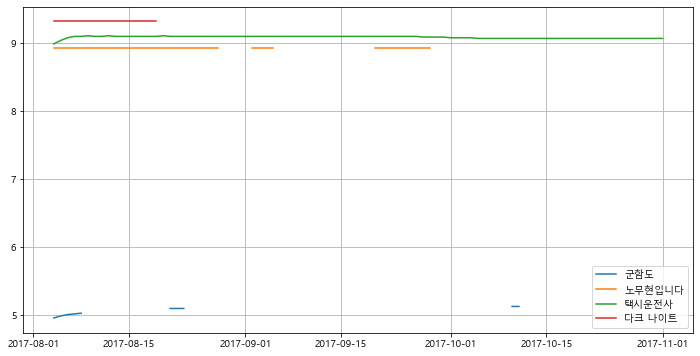

In [131]:
target_col = ['군함도', '노무현입니다', '택시운전사', '다크 나이트']
plt.figure(figsize=(12,6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()